```{image} https://www.epfl.ch/about/overview/wp-content/uploads/2020/07/logo-epfl-1024x576.png 
:width: 140px
:align: left
```
## Image Processing Laboratory Notebooks
---

This Juypter notebook is part of a series of computer laboratories which are designed
to teach image-processing programming; they are running on the EPFL's Noto server. They are the practical complement of the theoretical lectures of the EPFL's Master course 
[**MICRO-511 Image Processing I**](https://moodle.epfl.ch/course/view.php?id=522) taught by Prof. M. Unser and Prof. D. Van de Ville.

The project is funded by the Center for Digital Education and the School of Engineering. It is owned by the [Biomedical Imaging Group](http://bigwww.epfl.ch/). 
The distribution or the reproduction of the notebook is strictly prohibited without the written consent of the authors.  &copy; EPFL 2023.

**Authors**: 
    [Pol del Aguila Pla](mailto:pol.delaguilapla@epfl.ch), 
    [Kay Lächler](mailto:kay.lachler@epfl.ch),
    [Alejandro Noguerón Arámburu](mailto:alejandro.nogueronaramburu@epfl.ch),
    [Yan Liu](mailto:yan.liu@epfl.ch), and
    [Daniel Sage](mailto:daniel.sage@epfl.ch).
    
---

# Lab 1.1: Pixel-wise operations
**Released**: Thursday October 5, 2023

**Submission**: Friday October 13, 2023 before 23:59 on [Moodle](https://moodle.epfl.ch/course/view.php?id=522)

**Grade weight**: Lab 1 (15 points), 10% of the overall grade

**Related lectures**: Chapters 1 and 2

Double-click on this cell, fill your name and SCIPER number below to verify your identity in Noto and set the seed for random results.
:::{attention} Please write down your name and SCIPER! 
### Student Name: 
### SCIPER: 
:::

In [1]:
%use sos
import getpass
# This line recovers your camipro number to mark the images with your ID
uid = int(getpass.getuser().split('-')[2]) if len(getpass.getuser().split('-')) > 2 else ord(getpass.getuser()[0])
print(f'SCIPER: {uid}')

SCIPER: 262377


### Imports
In the next cell we import the python libraries that we will use throughout the lab, as well as the `ImageViewer` class (Python package developed specifically for these laboratories, see documentation [here](https://github.com/Biomedical-Imaging-Group/interactive-kit/wiki/Image-Viewer), or run the python command `help(viewer)` after loading the class):
* [`matplotlib.pyplot`](https://matplotlib.org), to display images,
* [`ipywidgets`](https://ipywidgets.readthedocs.io/en/latest/), to make the image display interactive, and
* [`numpy`](https://numpy.org/doc/stable/reference/), for mathematical operations on arrays.

Finally, we load the images used in this lab and make sure that it is of type `float64`, for higher accuracy during operations.

Run the next cell to get your notebook ready.

:::{attention}Always run the two import cells below before starting to work on the notebook.    
:::

In [2]:
%use sos
# Configure plotting as dynamic
%matplotlib widget

# Import required packages for this lab
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from skimage import io
from interactive_kit import imviewer as viewer

# Loading images
c_elegans = io.imread( "images/c-elegans.tif" )
pier = io.imread("images/pier.jpg").astype(np.float64)

In the following cell we import the JS `ImageAccess` class and put the images into the JavaScript kernel. You can find the documentation of the `ImageAccess` [here](https://biomedical-imaging-group.github.io/image-access/).

In [3]:
%use javascript
%get pier c_elegans
// import image-access as Image
var Image = require('image-access')

# Pixel-wise operations (8 points)

In this laboratory you will learn the basics of pixel-wise image processing by performing simple operations at a pixel level. This has many practical applications such as image normalization, colorization, and just to get information of an image. However, part of the goal of this laboratory is for you to feel comfortable with the process of accessing pixels of an image in both a high-level and a low-level language. Therefore, the laboratory will be mostly in *JavaScript*, and then we will use *Python* for a few applications.

(ToC_1_Pixelwise_operations)=
## Table of contents

1. [Image normalization](#image-formation) 
    1. [Pixelwise normalization](#pixelwise-normalization) **(4 points)**
    2. [Normalization in Python](#normalization-in-python) **(2 points)**
2. [Solarization](#solarization) **(2 points)**

:::{important} Each cell that contains code begins with `%use sos` or `%use javascript`. This indicates if the code in this specific cell should be executed in Python or JavaScript. Do not change or remove any lines of code that begin with an `%`. They need to be on the first line of each cell!
:::

### Image visualization
Run the next cell and use the slider to cycle through the images to get familiar with them.

In [4]:
%use sos
plt.close("all")
pier_viewer = viewer([pier] + list(c_elegans), title=['pier'] + [f'C Elegans {i}' for i in range(c_elegans.shape[0])], 
                     hist=True, widgets=True)

(image-normalization)=
# 1. Image normalization (6 points)
[Back to table of contents](#ToC_1_Pixelwise_operations)

Normalization is one of the key preprocessing steps in image processing. In this section, you will learn different ways to normalize an image.
(pixelwise-normalization)=
## 1.A. Pixelwise normalization (4 points)
[Back to table of contents](#ToC_1_Pixelwise_operations)

**For a total of 3 points**, complete the three functions below (**1 point each**), which output images normalized with respect to different statistics:

* `makeZeroMean(img)`: Normalizes the image so that the **sample mean of the pixel values is zero**. The standard deviation remains the same.
* `stretchContrast(img)`: Normalizes the image so that the **minimum value is $0$ and the maximum value is $1$ (the ratio $\frac{\sigma}{range}$ should not change)**. 
* `normalize2ndOrderStatistics(img)`: Normalizes the image so that the **sample mean of the pixel values is zero** and the **sample standard deviation is $1$**. 

JS, unlike Python, **does not** have a function to calculate the mean or the standard deviation. Thus, you will need to code them yourself explicitly.

:::{hint}You can use `img.getMin()` and `img.getMax()` to get the min an max value of a JavaScript image `img`. Remeber also that you can access a wide range of mathematical functions through the Math library in JS (e.g., `Math.sqrt()`). You can read more about it [here](https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Global_Objects/Math).
:::

:::{attention} Make sure to calculate the mean and standart deviation outside of the two for loops that iterate through the pixels of the image, otherwise the operation takes much too long to compute for real images!
:::

First, implement the function `makeZeroMean` in the cell below.

In [5]:
%use javascript
// function that normalizes the image so that the sample mean of the pixel values is zero.
function makeZeroMean(img){
    // declare the output image
    var output = new Image(img.shape());
    mean = 0
    
    // YOUR CODE HERE
    for(x = 0; x < img.nx; x++){
        for (y = 0; y < img.ny; y++){
            mean = mean + img.getPixel(x, y)
        }
    }
    mean = mean / (img.nx * img.ny)
    
    for(x = 0; x < img.nx; x++){
        for (y = 0; y < img.ny; y++){
            output.setPixel(x, y, img.getPixel(x, y) - mean)
        }
    }
    
    // return the output image
    return output;
}

Great! Now it's time to test your implementation. We will do two parallel tests: one on a simple $3×3$ array, one on a real image `pier`. If an error is thrown in any of the tests, you implementation is not yet correct. We will also test the execution time of your function, to tell you if you made a mistake. In future labs you will be responsible by yourself to check that you coded an efficient solution.

In [6]:
%use javascript
%get pier

// declare the test image
test_img = new Image([[0, 1, 2], [3, 4, 5], [6, 7, 8]]);
var pier_img = new Image(pier)

// run the zero mean function on the test image and on 'pier'
var test_zero_mean = makeZeroMean(test_img);
var pier_zero_mean = makeZeroMean(pier_img);
var start = Date.now();
var duration = Date.now() - start;

//Check the duration of your function (note that the unit of duration is ms)
if (duration > 10000){
    console.log('WARNING!\nThe function `makeZeroMean`  is taking way too long. Make sure to optimize your code. In particular, check that you are not iterating the image an unnecessary number of times.');
}

// Check if the output is as expected 
if(!(test_zero_mean.imageCompare(new Image([[-4, -3, -2], [-1, 0, 1], [2, 3, 4]])))){
    console.log("WARNING!\n The function `makeZeroMean` is not yet correct");
}else{// print victory message
    console.log('Nice, the function `makeZeroMean` seems to substract the mean!');}

// Check if the image has the correct behaviour
if (pier_img.getPixel(100, 100) - pier_zero_mean.getPixel(100, 100) > 152.14){
    console.log("WARNING!\nThe function `makeZeroMean` is not yet correct");
}else{// print victory message
    console.log('Nice, the function `makeZeroMean` seems to work on real images!');}

Nice, the function `makeZeroMean` seems to substract the mean!
Nice, the function `makeZeroMean` seems to work on real images!


Now, implement `stretchContrast`.

In [7]:
%use javascript

// function that normalizes the image so that all pixels have values between 0 and 1.
function stretchContrast(img){
    // declare the output image
    var output = new Image(img.shape());
    
    // YOUR CODE HERE
    for(x = 0; x < img.nx; x++){
        for (y = 0; y < img.ny; y++){
            output.setPixel(x, y, (img.getPixel(x, y) - img.getMin()) / (img.getMax() - img.getMin()))
        }
    }
    
    // return the output image
    return output;
}

Run the next cell to run a simple sanity check. Again, we will test on a simple $3\times 3$ image and then on `pier`.

In [8]:
%use javascript

// declare the test image
test_img = new Image([[0, 1, 2], [3, 4, 5], [6, 7, 8]]);
var pier_img = new Image(pier)

// run the stretch contrast function on the test image
var test_stretch = stretchContrast(test_img);
var start = Date.now();
var pier_stretch = stretchContrast(pier_img);
var duration = Date.now() - start;

//Check the duration of your function (note that the unit of duration is ms)
if (duration > 10000){
    console.log('WARNING!\nThe function `stretchConstrast` is taking way too long. Make sure to optimize your code. In particular, check that you are not iterating the image an unnecessary number of times.');
}

// compare the result to the correct result
if(!(test_stretch.imageCompare(new Image([[0, 0.125, 0.25], [0.375, 0.5, 0.625], [0.75, 0.875, 1]])))){
    console.log("WARNING!\nThe function `stretchConstrast` is not yet correct.");
}else{
    console.log('Nice, The function `stretchConstrast` seems to produce the correct output!');}

if(pier_stretch.getMax() != 1){
    console.log("WARNING!\nThe function `stretchConstrast` does not work on real images.");
}else{
    console.log('Nice, the function `stretchConstrast` is working on real images!');}

Nice, The function `stretchConstrast` seems to produce the correct output!
Nice, the function `stretchConstrast` is working on real images!


Finally, implement the function `normalize2ndOrderStatistics`.

In [9]:
%use javascript

// function that normalizes the image so that the sample mean of the pixel values is 0 and the sample standard deviation is 1.
function normalize2ndOrderStatistics(img){
    // declare the output image
    var output = new Image(img.shape());
    
    // YOUR CODE HERE
    var centered_img = makeZeroMean(img);
    var std = 0;
    for(x = 0; x < img.nx; x++){
        for (y = 0; y < img.ny; y++){
            std = std + centered_img.getPixel(x, y)*centered_img.getPixel(x, y)
        }
    }
    std = Math.sqrt(std / (img.nx * img.ny))
    
    for(x = 0; x < img.nx; x++){
        for (y = 0; y < img.ny; y++){
            output.setPixel(x, y, centered_img.getPixel(x, y) / std)
        }
    }
    
    // return the output image
    return output;
}

And run the next cell for a quick test again.

In [10]:
%use javascript

// declare the test image
test_img = new Image([[0, 1, 2], [3, 4, 5], [6, 7, 8]]);
var pier_img = new Image(pier)

// run the function on test_img
var test_normalize = normalize2ndOrderStatistics(test_img).toArray();
var start = Date.now();
var pier_normalize = normalize2ndOrderStatistics(pier_img);
var duration = Date.now() - start;

//Check the duration of your function (note that the unit of duration is ms)
if (duration > 10000){
    console.log('WARNING!\nThe function `normalize2ndOrderStatistics` is taking way too long. Make sure to optimize your code. In particular, check that you are not iterating the image an unnecessary number of times.');
}

// compare the result to the correct result
// test for unbiased estimator of variance
if(!(Image.arrayCompare(test_normalize, [[ -1.4605934866804429, -1.0954451150103321, -0.7302967433402214 ],
                                         [ -0.3651483716701107, 0, 0.3651483716701107 ],
                                         [ 0.7302967433402214, 1.0954451150103321, 1.4605934866804429 ]]))){
    // test for biased estimator of variance
    if(!(Image.arrayCompare(test_normalize, [[ -1.5491933384829668, -1.161895003862225, -0.7745966692414834 ],
                                             [ -0.3872983346207417, 0, 0.3872983346207417 ],
                                             [ 0.7745966692414834, 1.161895003862225, 1.5491933384829668 ]]))){
        console.log("WARNING!\nThe function `normalize2ndOrderStatistics` is not yet correct!");
    }else{
        // print victory message
        console.log('Good job! The function `normalize2ndOrderStatistics` seems to produce the correct output! You\'re using the biased estimator of the variance.');
    }
}else{
    // print victory message
    console.log('Good job! The function `normalize2ndOrderStatistics` seems to produce the correct output! You\'re using the unbiased estimator of the variance.');
}
//console.log(pier_normalize.getMax()) = 1.18950
//console.log(pier_normalize.getMin()) = -1.75930
if (Math.abs(pier_normalize.getMax() - 1.18950) > 0.01 || Math.abs(pier_normalize.getMin() + 1.75930) > 0.01){
    console.log("WARNING!\nThe function `normalize2ndOrderStatistics` is not working on real images!");
}else{
    console.log('Good job! The function `normalize2ndOrderStatistics` seems to be working on real images.')
}

Good job! The function `normalize2ndOrderStatistics` seems to produce the correct output! You're using the biased estimator of the variance.
Good job! The function `normalize2ndOrderStatistics` seems to be working on real images.


In order for you to see the relevance of image normalization, we provide a sequence of fluorescence microscopy images (see more [here](https://en.wikipedia.org/wiki/Fluorescence_microscope)), named `c_elegans`. These are consecutive slices of the same 3D volume, but appear darker over time due to photobleaching (the loss of fluorescence, read more [here](https://en.wikipedia.org/wiki/Photobleaching)). Of course, this is a huge problem for the application, and to solve it we absolutely need to normalize these images.

Run the next cell to load the `c_elegans` series, and display it. We will use the module [io](https://scikit-image.org/docs/0.8.0/api/skimage.io.html) of SciKit-Image, which allows us to read all the slices of a `.tif` file at once. Furthermore, we will pass it to JS so that we can use the functions you defined above.

:::{note} In the next cell, you will see the original images, and a graph that shows the effect of photobleaching on the mean value of each image. Make sure you explore the images and their histogram by clicking on the `Prev` and `Next` buttons! 
:::

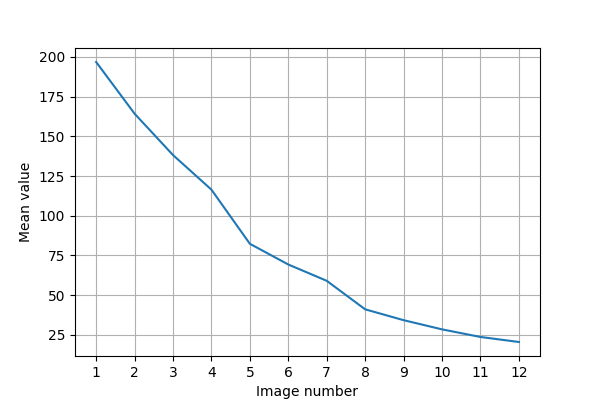

In [11]:
%use sos
%put c_elegans --to javascript
 
# Show c_elegans images
plt.close("all")
viewer([c_elegans[ind,:,:] for ind in range(12)], normalize=False, clip_range=[0, 255], title=[f"c_elegans {ind+1}" for ind in range(12)], hist=True)
# Show decay of the mean value through time due to photobleaching
fig = plt.figure(num=f"SCIPER: {uid}",figsize=(6,4))
plt.plot([ind+1 for ind in range(12)], [np.mean(c_elegans[ind,:,:]) for ind in range(12)])
plt.xticks([ind+1 for ind in range(12)]); plt.xlabel("Image number"); plt.ylabel("Mean value"); 
plt.grid('both'); plt.show();

Now we are going to visualize the effect of each of your normalizing functions on `c_elegans`. For this purpose, we provide with you the function `make_montage(img_arr, mode, cols)`. It performs the operation specified by `mode` (1: zero mean, 2: stretch contrast, 3: normalize statistics) on each image, then places the result in the right place inside the montage `out`.

Now run the next cell to declare the function `makeMontage()`.

In [12]:
%use javascript

// function that creates a single image from multiple images (slices) and performs the specified function on the images
function makeMontage(img_arr, mode, cols) {
    // get dimensions of each image
    var w = img_arr[0].nx;
    var h = img_arr[0].ny;
    // determine the number of rows 
    var rows = img_arr.length/cols;
    // initialize output image 
    var out = new Image(h*rows, w*cols);    
    // iterate through each image in img_arr
    for(t=0; t<rows*cols; t++){
        // extract the corresponding image 
        var img = img_arr[t].copy();
        // check requested operation 
        //(note that any mode other than 1, 2 or 3 simply copies the original images in the montage)
        if(mode == 1){ 
            img = makeZeroMean(img);
        }             
        if(mode == 2){
            img = stretchContrast(img);
        }
        if(mode == 3){
            img = normalize2ndOrderStatistics(img);
        }            
        // put result in the corresponding place
        out.putSubImage(Math.floor(t%cols)*w, Math.floor(t/cols)*h, img);
    }
    // return output image
    return out;
}

Now, we are going apply your methods to the image slices we just loaded. First, we convert each element in the array `c_elegans`  to an `Image` object. Then, we call the function on the array with each of the three modes to visualize the result of the functions that you implemented above.

In [13]:
%use javascript
%put montage_original montage_zero_mean_js montage_normalize_statistics_js montage_stretch_contrast_js 

// convert each element in the c_elegans array to an Image object
var c_elegans_imgs = new Array();
for(x = 0; x < c_elegans.length; x++){
    var tmp = c_elegans_imgs.push(new Image(c_elegans[x]));
}

// run makeMontage with all four functions (modes)
var montage_original = makeMontage(c_elegans_imgs, 0, 3).toArray();
var montage_zero_mean_js = makeMontage(c_elegans_imgs, 1, 3).toArray();
var montage_stretch_contrast_js = makeMontage(c_elegans_imgs, 2, 3).toArray();
var montage_normalize_statistics_js = makeMontage(c_elegans_imgs, 3, 3).toArray();

Now that we have applied your functions and that we have the variables in Python, let's visualize them. Run the following cell to do so. Use the buttons `Next` and `Prev` to browse through the three images. If your implementations passed the previous tests, you should see the correct result. Look carefully at the images and solve the two MCQs coming next.

In [14]:
%use sos
# Define the lists of images and titles
image_list = [np.array(montage_original), np.array(montage_zero_mean_js), np.array(montage_stretch_contrast_js), np.array(montage_normalize_statistics_js)]
title_list = ['Original c_elegans', 'Zero Mean c_elegans', 'Stretch Contrast c_elegans', 'Normalize Statistics c_elegans']

# Display the montages
plt.close('all')
normalization_viewer = viewer(image_list, title=title_list, widgets=True)

### Multiple choice questions

Why does the bottom-right corner of the **Zero Mean Montage** have lower contrast than the top-left corner? (**0.5 points**)

1. Because the different subimages in the montage have different spreads of values around their mean.
2. It is an illumination effect.
3. The bottom-right subimages of the montage are defective.

Modify the variable `answer` in the next cell to reflect your choices. 

In [15]:
%use sos
# Assign your answer to this variable
answer = None
# YOUR CODE HERE
answer = 1

In [16]:
%use sos
if not answer in [1, 2, 3]: 
    print('WARNING!\nPossible answers are 1, 2 or 3.')

Why is this not the case for the other two montages? (**0.5 points**)

1. Becuase the images already had zero mean.
2. Because the other two functions modify the contrast by adjusting the range of intensities.

Modify the variable `answer` in the next cell to reflect your choices. As usual, there is another cell that will remind you to select a valid choice if you haven't.

In [17]:
%use sos
# assign your answer to this variable
answer = None
# YOUR CODE HERE
answer = 2

In [18]:
%use sos
if not answer in [1, 2]: 
    print('WARNING!\nPossible answers are 1 and 2.')

(normalization-in-python)=
## 1.B. Normalization in Python (2 points)
[Back to table of contents](#ToC_1_Pixelwise_operations)

As you have probably realized by now, low level languages can get tedious. You can do the same thing you did in JavaScript in less lines in Python, by using NumPy arrays, so let's do it! 

As an example, we have implemented the function `make_zero_mean`. **For a total of 2 points**, implement the other two methods (`stretch_contrast` and `normalize_2nd_order_statistics`) in Python in the following cells (**1 point each**). 

:::{hint}
It's possible to complete every function with only one line of code using Numpy built-in functions, so **for-loops are not accepted!**
:::

In [19]:
%use sos
# Function that normalizes the image so that the sample mean of the pixel values is zero.
def make_zero_mean(img):
    # Declare the output image
    output = np.zeros(img.shape)
    # Subtract the mean from the input image
    output = img-np.mean(img)
    # Return the output image
    return output

In [20]:
# Function that normalizes the image so that all pixels have values between 0 and 1.
def stretch_contrast(img):
    # Declare the output image
    output = np.zeros(img.shape)
    
    # YOUR CODE HERE
    output = (img - np.min(img)) / (np.max(img) - np.min(img))
    
    # Return the output image
    return output

In [21]:
# Function that normalizes the image so that the sample mean of the pixel values is 0 and the sample standard deviation is 1.
def normalize_2nd_order_statistics(img):
    # Declare the output image
    output = np.zeros(img.shape)
    
    # YOUR CODE HERE
    output = (img - np.mean(img)) / np.std(img)
    
    # Return the output image
    return output

Use the next two cells for a quick test on your functions. This cell tests the two characteristics requested for each function:
* that the result of `stretch_contrast` is in the range $[0, 1]$, and
* that the result of `normalize_2nd_order_statistics` has zero mean and unit variance. 

Run them, and if your implementations are correct, they shouldn't raise any errors.

In [22]:
%use sos
# This cell tests your method stretch contrast
# Here we run your function on the first slice of c_elegans
test_stretch_contrast = stretch_contrast(c_elegans[0])

# And we check that stretch_contrast effectively maps the pixels to the range [0,1]
if np.min(test_stretch_contrast) != 0: 
    print('WARNING!!\nThe minimum value in the result of stretch_contrast is not 0')
elif np.max(test_stretch_contrast) != 1: 
    print('WARNING!!\nThe maximum value in the result of stretch_contrast is not 1')
else :
    print("Well done! Your stretch_contrast function seems to be correct.")

Well done! Your stretch_contrast function seems to be correct.


In [23]:
%use sos
# This cell tests your method normalize statistics
# Here we run the method on the first slice of c_elegans
test_normalize_statistics = normalize_2nd_order_statistics(c_elegans[0])

# Now we check that normalize_statistics returns an image with mean = 0, 
if np.abs(np.mean(test_normalize_statistics)) > 1e-10: 
    print('WARNING!!\nYour mean in normalize_2nd_order_statistics is not 0')
# And with std = 1 
elif np.abs(np.std(test_normalize_statistics) - 1) > 1e-4 or np.abs(np.std(test_normalize_statistics, ddof=1) - 1) > 1e-4: 
    print('WARNING!!\nYour standard deviation in normalize_2nd_order_statistics is not 1')
else :
    print('Well done! Your normalization of 2nd order statistics seems to be correct.')

Well done! Your normalization of 2nd order statistics seems to be correct.


(solarization)=
# 2. Solarization (2 points)
[Back to table of contents](#ToC_1_Pixelwise_operations)

[Solarization](https://en.wikipedia.org/wiki/Solarization_(photography)) is one of the oldest effects known in photography. It refers to the *tone reversal* effect that is achieved by over exposure of certain photographic papers during the development process. In this context, *tone reversal* means that the brightest objects (e.g. the sun) appear darker than the rest of the image. After its discovery, the solarization effect was used for artistic purposes. Of course when digital photography came in, it stopped being an over-exposure effect, but it can still be artificially provoked for artistic purposes. 

Solarization can be expressed mathematically (assuming that our photo has a range of $[0, 255]$) as 
$$h[k, l] = \begin{cases}
    255 - (255 - T)*\frac{g[k, l]}{T},& \text{if } g[k, l] < T\\
    g[k, l],              & \text{if } g[k, l] \geq T.
\end{cases}$$
Where $g$ is the input image, $h$ is the solarized output image, and $T$ is the threshold defining the strength of the solarization.

In the next cell, **for 1 point**, Complete the function `solarize` in JS that implements the formula above. 

In [24]:
%use javascript
// function that applies the solarization effect to an image
function solarize(img, T){
    // Declare output variable
    var output = new Image(img.shape());
    
    // YOUR CODE HERE
    for(x = 0; x < img.nx; x++){
        for (y = 0; y < img.ny; y++){
            if (img.getPixel(x, y) < T){
                output.setPixel(x, y, 255 - (255 - T) * img.getPixel(x, y) / T)
            }
            else {
                output.setPixel(x, y, img.getPixel(x, y))
            }
        }
    }
    
    return output; 
}

Now let's apply your function to the image `pier` with a threshold of $150$.

In [25]:
%use javascript
%get pier
%put solarized_pier

var solarized_pier = solarize(new Image(pier), 150).toArray();

In order to check your function and to be able to explore the effect more interactively, run the next cell, where we define the Python equivalent of the `solarize` function and compare it to your JavaScript function. The Python function also takes an original image `img` and a threshold `T` as inputs, and returns the solarized version. Make sure to understand the code, and if you have any doubts, go back to the [introductory lab](../0_Introductory_lab/Introductory.ipynb) or read more about [boolean indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html#boolean-array-indexing). Look at the two images and check if they're the same. If you are unsure, you can go to the `Options` menu of the viewer and click `Compare`. If there is a difference between the two images it will be highlighted in red.

In [29]:
%use sos
%get solarized_pier --from javascript
# Define solarize
def solarize(img, T=None):
    output = np.copy(img)
    if T == None:
        T = T_slider.value
    output[output < T] = 255 - (255-T) * output[output<T] / T
    return output

plt.close('all')
view = viewer([solarize(pier, T=150), np.array(solarized_pier) ], title=['Solarized Python', 'Solarized JavaScript'], 
              subplots=[1, 2], widgets=True)

In the next cell, we provide with you an interactive viewer, where you can play around with the threshold value $T$ to see the different effects this can have on the image. To do so, go to the menu `Extra Widgets`, change the threshold `T`, and click on the `Solarize` button. If you want to see the original image again, just click `Reset`.

In [27]:
%use sos
# Declare extra widgets
T_slider = widgets.IntSlider(value=150, min=0, max=255, step=1, description='T')
button = widgets.Button(description='Solarize')

plt.close('all')
view = viewer(pier, title=['Solarized pier'], new_widgets=[T_slider, button], callbacks=[solarize], widgets=True)

### Multiple Choice Questions

Answer the following two questions, worth **0.5 each**, assuming a fixed parameter $T$. Think of the function `solarize` as an operator.

Q1. Is `solarize` a linear operator?

Q2. Is `solarize` a shift-invariant operator?

In the following cell, change the values of `q1_ans` and `q2_ans` to reflect your answers. **Assign a boolean (`True` or `False`)** to the corresponding variables. Then, run the following two cells to check if your choices are valid. 

In [51]:
%use sos

# Change the values of the following variables
q1_ans = None
q2_ans = None
# YOUR CODE HERE
q1_ans = False
q2_ans = True

In [52]:
%use sos
if not isinstance(q1_ans, bool):
    print('WARNING!\nq1_ans should be a boolean variable (True or False)')

In [53]:
%use sos
if not isinstance(q2_ans, bool):
    print('WARNING!\nq2_ans should be a boolean variable (True or False)')

Congratulations on finishing the first part of the Pixel-Fourier lab!</b></p>

:::{attention}
Make sure to save your notebook (you might want to keep a copy on your personal computer) and upload it to [Moodle](https://moodle.epfl.ch/mod/assign/view.php?id=1157357), in a zip file with the other notebook of this lab.

* Keep the name of the notebook as: *1_Pixelwise_Operations.ipynb*,
* Name the zip file: *Pixel_Fourier_lab.zip*.
:::